PYTORCH

In [ ]:
# Setting Up PyTorch
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=3)  # Input layer to hidden layer
        self.relu = nn.ReLU()                                   # Non-linear activation function
        self.layer2 = nn.Linear(in_features=3, out_features=1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()                             # Output layer activation

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Initialize the network
net = SimpleNN()
print(net)

# Example input
input_features = torch.tensor([[1.0, 2.0]])
output = net(input_features)
print("Output of the network:", output)


SimpleNN(
  (layer1): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Output of the network: tensor([[0.2915]], grad_fn=<SigmoidBackward0>)


In [ ]:
# Dummy dataset
inputs = torch.randn(100, 2)
targets = torch.where((inputs[:, 0] + inputs[:, 1] > 0), 1.0, 0.0).view(-1, 1)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.7551
Epoch [11/100], Loss: 0.6964
Epoch [21/100], Loss: 0.6563
Epoch [31/100], Loss: 0.6176
Epoch [41/100], Loss: 0.5735
Epoch [51/100], Loss: 0.5191
Epoch [61/100], Loss: 0.4554
Epoch [71/100], Loss: 0.3924
Epoch [81/100], Loss: 0.3360
Epoch [91/100], Loss: 0.2890


In [ ]:
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.relu = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm1d(5)
        self.dropout = nn.Dropout(0.25)
        self.layer2 = nn.Linear(5, 3)
        self.layer3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Redefine the net with the new complex architecture
net = ComplexNN()
print(net)

# Re-run training code from the previous example here...


ComplexNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (batch_norm1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
class ActivationVariationNN(nn.Module):
    def __init__(self):
        super(ActivationVariationNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(5, 3)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.layer3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.tanh(self.layer1(x))
        x = self.leaky_relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Instantiate and print the network with varied activations
net = ActivationVariationNN()
print(net)


ActivationVariationNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=5, out_features=3, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Generate some synthetic data
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.numpy())

# Convert to tensors
X_scaled = torch.tensor(X_scaled).float()
y = torch.tensor(y).float()

# Create DataLoader for batch processing
dataset = TensorDataset(X_scaled, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


/tmp/ipython-input-6-2495399561.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).float()


In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()  # Consider trying nn.LeakyReLU() or nn.ELU() as alternatives

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = Model()


In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

#model = Model()
#model.apply(init_weights)


In [ ]:
class BNModel(nn.Module):
    def __init__(self):
        super(BNModel, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.bn1 = nn.BatchNorm1d(20)
        self.layer2 = nn.Linear(20, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.relu(self.layer1(x)))
        x = self.bn2(self.relu(self.layer2(x)))
        x = self.output_layer(x)
        return x

bn_model = BNModel()


In [ ]:
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(20, 10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout(self.relu(self.layer1(x)))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

dropout_model = DropoutModel()


In [ ]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

# In your training loop
for epoch in range(100):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Adjust the learning rate
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 1.0078294277191162
Epoch 2, Loss: 0.5736507177352905
Epoch 3, Loss: 1.0862886905670166
Epoch 4, Loss: 0.9655734896659851
Epoch 5, Loss: 0.5219703316688538
Epoch 6, Loss: 1.4139864444732666
Epoch 7, Loss: 0.7118731141090393
Epoch 8, Loss: 0.5269113779067993
Epoch 9, Loss: 0.7068461775779724
Epoch 10, Loss: 1.305874228477478
Epoch 11, Loss: 1.8669315576553345
Epoch 12, Loss: 0.5515663027763367
Epoch 13, Loss: 1.7371752262115479
Epoch 14, Loss: 0.42567819356918335
Epoch 15, Loss: 0.8376687169075012
Epoch 16, Loss: 0.8304821252822876
Epoch 17, Loss: 0.5617865920066833
Epoch 18, Loss: 1.3566941022872925
Epoch 19, Loss: 1.4696866273880005
Epoch 20, Loss: 0.7791377902030945
Epoch 21, Loss: 0.7437573075294495
Epoch 22, Loss: 0.8010820150375366
Epoch 23, Loss: 1.0355145931243896
Epoch 24, Loss: 1.2268145084381104
Epoch 25, Loss: 0.6520463228225708
Epoch 26, Loss: 0.329120397567749
Epoch 27, Loss: 0.3293032944202423
Epoch 28, Loss: 0.5498729944229126
Epoch 29, Loss: 0.582102060317

MNIST

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim


# Transformations applied on each image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the MNIST dataset
])

# Downloading the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 53.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.52MB/s]


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
import torch.nn as nn

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()  # Instantiate ReLU
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()  # Instantiate ReLU
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)  # Apply ReLU
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)  # Apply ReLU
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = MNISTNet().to(device)
net.apply(init_weights)

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


Epoch 1/10 completed. Loss: 0.3644
Epoch 2/10 completed. Loss: 0.4259
Epoch 3/10 completed. Loss: 0.2303
Epoch 4/10 completed. Loss: 0.7609
Epoch 5/10 completed. Loss: 0.2171
Epoch 6/10 completed. Loss: 0.5356
Epoch 7/10 completed. Loss: 0.1416
Epoch 8/10 completed. Loss: 0.0717
Epoch 9/10 completed. Loss: 0.1080
Epoch 10/10 completed. Loss: 0.1222


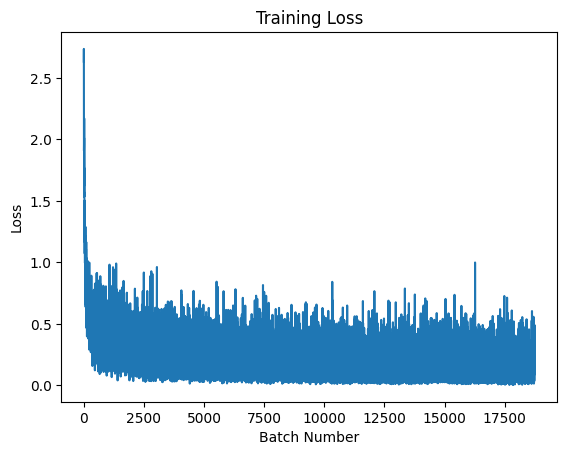

In [ ]:
def train(epochs, net, train_loader, optimizer, scheduler):
    net.train()
    loss_history = []

    for epoch in range(epochs):
        for data, target in train_loader:
            data, target = data.to("cpu"), target.to("cpu")
            optimizer.zero_grad()
            output = net(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
        scheduler.step()
        print(f"Epoch {epoch+1}/{epochs} completed. Loss: {loss.item():.4f}")

    plt.plot(loss_history)
    plt.title("Training Loss")
    plt.xlabel("Batch Number")
    plt.ylabel("Loss")
    plt.show()

train(10, net, train_loader, optimizer, scheduler)



Test set: Average loss: 0.0024, Accuracy: 9767/10000 (98%)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

F1 Score: 0.97661605740286


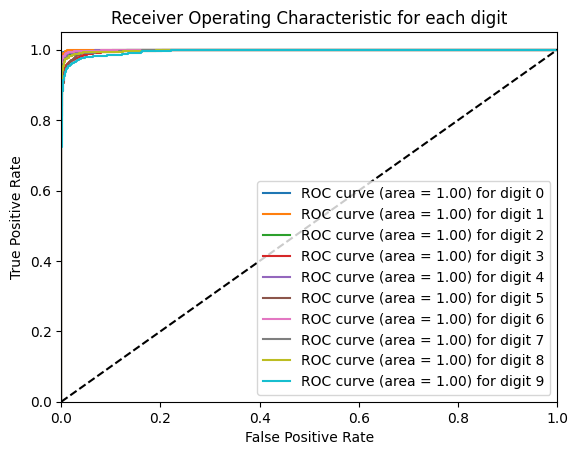

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

def evaluate(net, test_loader):
    net.eval()
    test_loss = 0
    correct = 0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to("cpu"), target.to("cpu")
            output = net(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).detach().cpu().sum().item()
            all_targets.extend(target.view_as(pred).detach().cpu().numpy())
            all_outputs.extend(output.detach().cpu().numpy())

    # Calculate metrics
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

    # Classification report and F1-Score
    all_preds = np.argmax(all_outputs, axis=1)
    print(classification_report(all_targets, all_preds))
    print("F1 Score:", f1_score(all_targets, all_preds, average='macro'))

    # ROC Curve for each class
    targets_one_hot = label_binarize(all_targets, classes=np.arange(10))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(targets_one_hot[:, i], np.array(all_outputs)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.figure()
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for digit {i}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for each digit')
    plt.legend(loc="lower right")
    plt.show()

evaluate(net, test_loader)


CIFAR 10

In [ ]:
import torch.multiprocessing as mp

# Use torch.multiprocessing instead of multiprocessing
mp.set_start_method('spawn', force=True)

import torch
import torchvision
import torchvision.transforms as transforms

# Data transformation with normalization
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize RGB channels

# Loading the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

# Loading the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:02<00:00, 76.5MB/s]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels (RGB), 6 output channels, 5x5 square convolution
        self.pool = nn.MaxPool2d(2, 2)   # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 28x28x6 - > pool ->14x14x6
        x = self.pool(F.relu(self.conv2(x))) # 10x10x16 - > pool -> 5x5x16
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to("cpu")


[1,   200] loss: 2.302
[1,   400] loss: 2.297
[1,   600] loss: 2.288
[1,   800] loss: 2.259
[1,  1000] loss: 2.204
[1,  1200] loss: 2.157
[1,  1400] loss: 2.119
[2,   200] loss: 2.039
[2,   400] loss: 1.995
[2,   600] loss: 1.969
[2,   800] loss: 1.936
[2,  1000] loss: 1.907
[2,  1200] loss: 1.884
[2,  1400] loss: 1.825
Finished Training


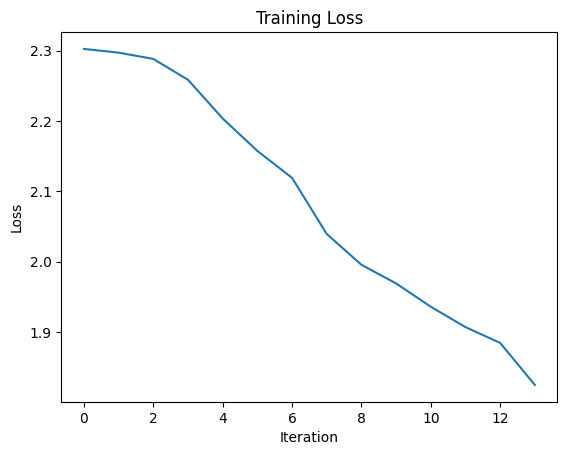

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the network
loss_history = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to("cpu"), labels.to("cpu")


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            loss_history.append(running_loss / 200)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

# Plotting the training loss
plt.figure()
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cpu"), labels.to("cpu")
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 35 %


FMNIST

In [ ]:
# Install dependencies (if needed)
# !pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# ----------------------------
# Load FMNIST dataset
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# ----------------------------
# Define a simple NN (SimpleNN)
# ----------------------------
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNN()
print(net)

# ----------------------------
# Training loop for SimpleNN
# ----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

def train_model(net, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

train_model(net)

# ----------------------------
# Define a complex NN (ComplexNN)
# ----------------------------
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = ComplexNN()
print(net)

# ----------------------------
# Training loop for ComplexNN
# ----------------------------
optimizer = optim.Adam(net.parameters(), lr=0.001)
train_model(net)

# ----------------------------
# Evaluation
# ----------------------------
def evaluate_model(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(net)


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.63MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 6.75MB/s]


SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1, Loss: 0.6734
Epoch 2, Loss: 0.4690
Epoch 3, Loss: 0.4294
Epoch 4, Loss: 0.4041
Epoch 5, Loss: 0.3855
ComplexNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)
Epoch 1, Loss: 0.5031
Epoch 2, Loss: 0.3982
Epoch 3, Loss: 0.3658
Epoch 4, Loss: 0.3458
Epoch 5, Loss: 0.3303
Test Accuracy: 86.12%


LeNET-5


=== Training LeNet-5 on MNIST ===
Epoch 1, Loss: 0.2505
Epoch 2, Loss: 0.0869
Epoch 3, Loss: 0.0595
Epoch 4, Loss: 0.0472
Epoch 5, Loss: 0.0380


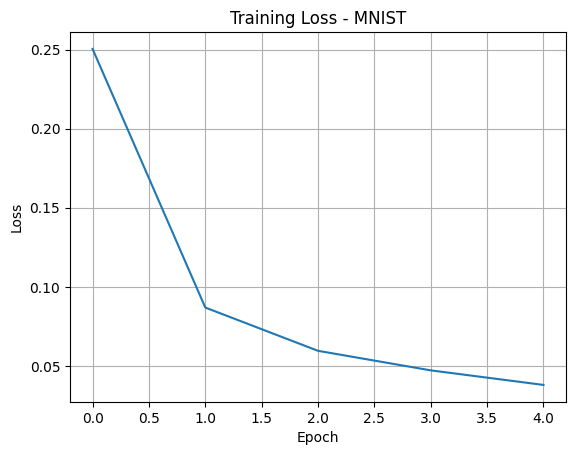


Classification Report for MNIST:
              precision    recall  f1-score   support

           0     0.9939    0.9929    0.9934       980
           1     0.9947    0.9894    0.9920      1135
           2     0.9922    0.9816    0.9868      1032
           3     0.9680    0.9871    0.9775      1010
           4     0.9769    0.9908    0.9838       982
           5     0.9638    0.9843    0.9739       892
           6     0.9863    0.9791    0.9827       958
           7     0.9651    0.9942    0.9794      1028
           8     0.9884    0.9661    0.9772       974
           9     0.9918    0.9554    0.9732      1009

    accuracy                         0.9822     10000
   macro avg     0.9821    0.9821    0.9820     10000
weighted avg     0.9824    0.9822    0.9822     10000


=== Training LeNet-5 on FMNIST ===
Epoch 1, Loss: 0.6133
Epoch 2, Loss: 0.4226
Epoch 3, Loss: 0.3682
Epoch 4, Loss: 0.3369
Epoch 5, Loss: 0.3150


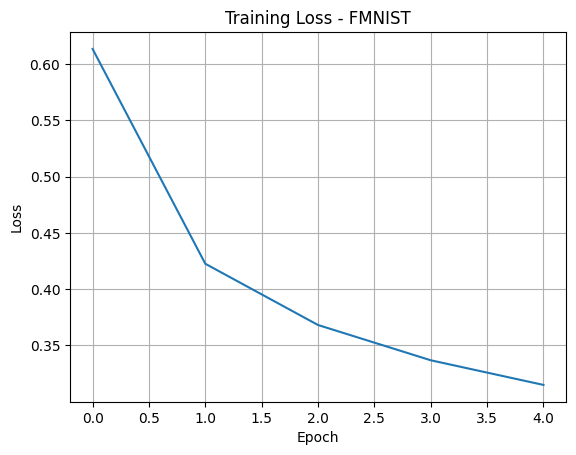


Classification Report for FMNIST:
              precision    recall  f1-score   support

           0     0.8156    0.7960    0.8057      1000
           1     0.9857    0.9680    0.9768      1000
           2     0.8522    0.6630    0.7458      1000
           3     0.9065    0.8730    0.8895      1000
           4     0.7755    0.8120    0.7934      1000
           5     0.9735    0.9550    0.9642      1000
           6     0.5866    0.7250    0.6485      1000
           7     0.9263    0.9680    0.9467      1000
           8     0.9623    0.9710    0.9667      1000
           9     0.9654    0.9490    0.9571      1000

    accuracy                         0.8680     10000
   macro avg     0.8750    0.8680    0.8694     10000
weighted avg     0.8750    0.8680    0.8694     10000


=== Training LeNet-5 on CIFAR10 ===
Epoch 1, Loss: 2.0440
Epoch 2, Loss: 1.8391
Epoch 3, Loss: 1.7208
Epoch 4, Loss: 1.6392
Epoch 5, Loss: 1.5742


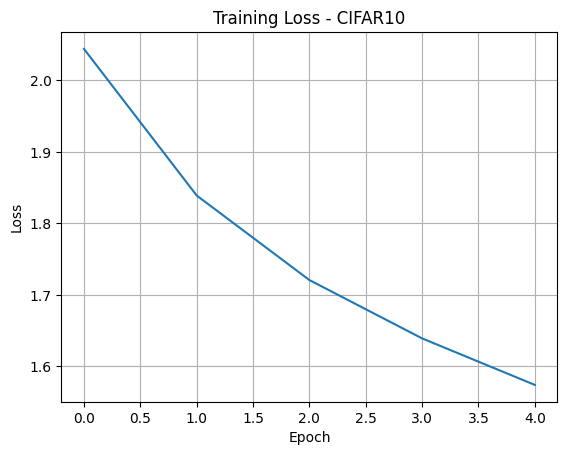


Classification Report for CIFAR10:
              precision    recall  f1-score   support

           0     0.4182    0.3680    0.3915      1000
           1     0.5074    0.5170    0.5121      1000
           2     0.3534    0.2760    0.3099      1000
           3     0.3061    0.2020    0.2434      1000
           4     0.3431    0.3400    0.3415      1000
           5     0.4453    0.3300    0.3791      1000
           6     0.5012    0.4030    0.4468      1000
           7     0.4521    0.5290    0.4876      1000
           8     0.4229    0.6420    0.5099      1000
           9     0.4032    0.5790    0.4754      1000

    accuracy                         0.4186     10000
   macro avg     0.4153    0.4186    0.4097     10000
weighted avg     0.4153    0.4186    0.4097     10000



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ----------------------
# Define LeNet-5
# ----------------------
class LeNet5(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 6, kernel_size=5)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# ----------------------
# Utility functions
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([transforms.Resize((28, 28)),
                                    transforms.ToTensor()])
    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
        transform = transforms.Compose([transforms.Resize((64, 64)),
                                        transforms.Grayscale(),
                                        transforms.Resize((28, 28)),
                                        transforms.ToTensor()])
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

    return train_loader, test_loader


def train_and_evaluate(dataset_name):
    print(f"\n=== Training LeNet-5 on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cpu")
    model = LeNet5().to('cpu')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_loss_history = []

    # Training
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to('cpu'), labels.to('cpu')
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to('cpu')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print(f"\nClassification Report for {dataset_name}:")
    print(classification_report(all_labels, all_preds, digits=4))
    record_metrics("LeNet-5", dataset_name, all_labels, all_preds)


# ----------------------
# Run LeNet-5 on MNIST, FMNIST, CIFAR-10
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)




ALEXNET


=== Training AlexNet on MNIST ===
Epoch 1, Loss: 0.2818
Epoch 2, Loss: 0.0658
Epoch 3, Loss: 0.0490
Epoch 4, Loss: 0.0392
Epoch 5, Loss: 0.0319


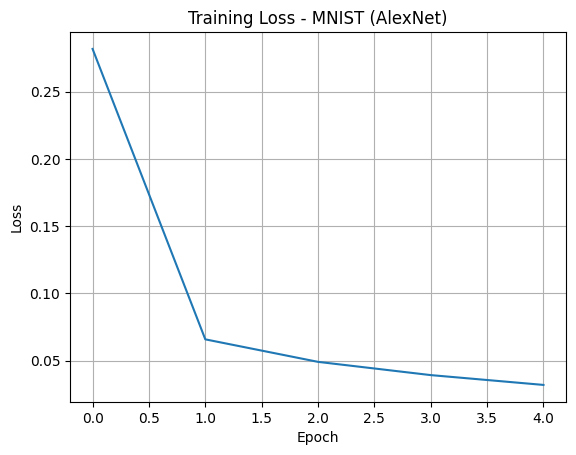


Classification Report for MNIST (AlexNet):
              precision    recall  f1-score   support

           0     0.9664    0.9990    0.9824       980
           1     0.9930    0.9947    0.9938      1135
           2     0.9884    0.9884    0.9884      1032
           3     0.9777    0.9990    0.9882      1010
           4     0.9829    0.9980    0.9904       982
           5     0.9989    0.9776    0.9881       892
           6     0.9989    0.9530    0.9754       958
           7     0.9846    0.9942    0.9894      1028
           8     0.9948    0.9825    0.9886       974
           9     0.9950    0.9881    0.9915      1009

    accuracy                         0.9878     10000
   macro avg     0.9881    0.9874    0.9876     10000
weighted avg     0.9880    0.9878    0.9878     10000


=== Training AlexNet on FMNIST ===
Epoch 1, Loss: 0.6397
Epoch 2, Loss: 0.3628
Epoch 3, Loss: 0.3051
Epoch 4, Loss: 0.2719
Epoch 5, Loss: 0.2468


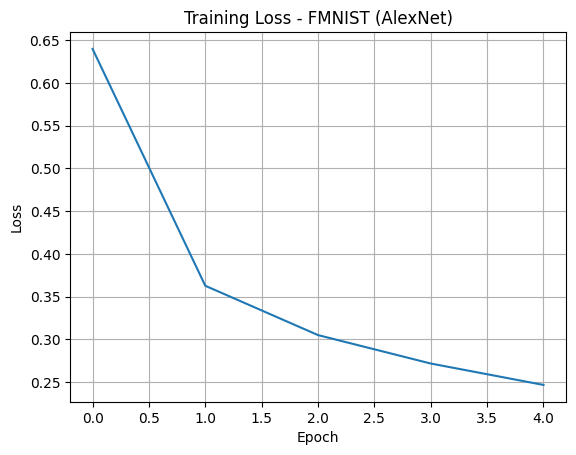


Classification Report for FMNIST (AlexNet):
              precision    recall  f1-score   support

           0     0.8516    0.8780    0.8646      1000
           1     0.9909    0.9750    0.9829      1000
           2     0.8920    0.8090    0.8485      1000
           3     0.8890    0.9050    0.8969      1000
           4     0.7853    0.8960    0.8370      1000
           5     0.9724    0.9860    0.9791      1000
           6     0.7639    0.6990    0.7300      1000
           7     0.9426    0.9690    0.9556      1000
           8     0.9789    0.9730    0.9759      1000
           9     0.9783    0.9470    0.9624      1000

    accuracy                         0.9037     10000
   macro avg     0.9045    0.9037    0.9033     10000
weighted avg     0.9045    0.9037    0.9033     10000


=== Training AlexNet on CIFAR10 ===
Epoch 1, Loss: 1.6380
Epoch 2, Loss: 1.2131
Epoch 3, Loss: 1.0232
Epoch 4, Loss: 0.8837
Epoch 5, Loss: 0.7729


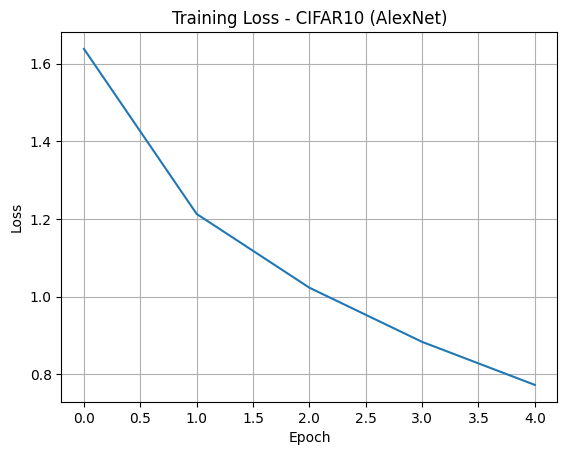


Classification Report for CIFAR10 (AlexNet):
              precision    recall  f1-score   support

           0     0.8027    0.6020    0.6880      1000
           1     0.6858    0.9100    0.7821      1000
           2     0.6377    0.5140    0.5692      1000
           3     0.5662    0.4060    0.4729      1000
           4     0.6236    0.6760    0.6488      1000
           5     0.5918    0.6190    0.6051      1000
           6     0.7184    0.8240    0.7676      1000
           7     0.7056    0.7910    0.7459      1000
           8     0.8371    0.7810    0.8081      1000
           9     0.7353    0.7860    0.7598      1000

    accuracy                         0.6909     10000
   macro avg     0.6904    0.6909    0.6847     10000
weighted avg     0.6904    0.6909    0.6847     10000



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ----------------------
# Define AlexNet
# ----------------------
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # Dummy input to determine the correct flattened feature size
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 64, 64)
            dummy_output = self.features(dummy_input)
            flatten_size = dummy_output.view(1, -1).size(1)

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(flatten_size, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# ----------------------
# Data Loader
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

    return train_loader, test_loader

# ----------------------
# Training and Evaluation
# ----------------------
def train_and_evaluate(dataset_name):
    print(f"\n=== Training AlexNet on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cpu")
    model = AlexNet().to('cpu')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    train_loss_history = []

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to('cpu'), labels.to('cpu')
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name} (AlexNet)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to('cpu')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print(f"\nClassification Report for {dataset_name} (AlexNet):")
    print(classification_report(all_labels, all_preds, digits=4))
    record_metrics("AlexNet", dataset_name, all_labels, all_preds)


# ----------------------
# Run on all 3 datasets
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)


GOOGLENET


=== Training GoogLeNet on MNIST ===


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.11MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.58MB/s]


Epoch 1, Loss: 0.2459
Epoch 2, Loss: 0.0848
Epoch 3, Loss: 0.0676
Epoch 4, Loss: 0.0580
Epoch 5, Loss: 0.0505


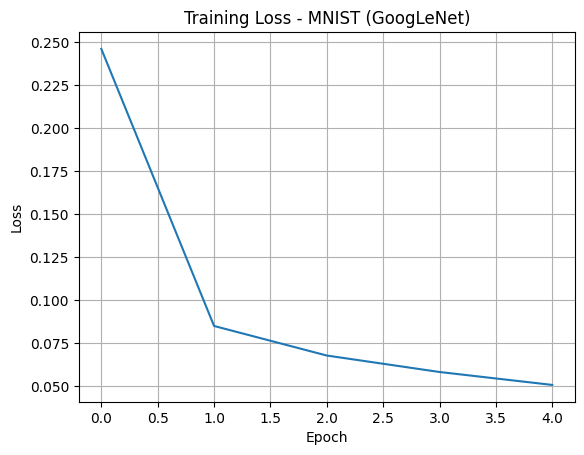


Classification Report for MNIST (GoogLeNet):
              precision    recall  f1-score   support

           0     0.9919    0.9980    0.9949       980
           1     0.9956    0.9974    0.9965      1135
           2     0.9837    0.9971    0.9904      1032
           3     0.9883    1.0000    0.9941      1010
           4     0.9959    0.9868    0.9913       982
           5     0.9933    0.9922    0.9927       892
           6     0.9989    0.9864    0.9926       958
           7     0.9951    0.9815    0.9882      1028
           8     0.9969    0.9887    0.9928       974
           9     0.9823    0.9921    0.9872      1009

    accuracy                         0.9921     10000
   macro avg     0.9922    0.9920    0.9921     10000
weighted avg     0.9921    0.9921    0.9921     10000


=== Training GoogLeNet on FMNIST ===


100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.83MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 48.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.14MB/s]


Epoch 1, Loss: 0.7239
Epoch 2, Loss: 0.4622
Epoch 3, Loss: 0.3939
Epoch 4, Loss: 0.3454
Epoch 5, Loss: 0.3055


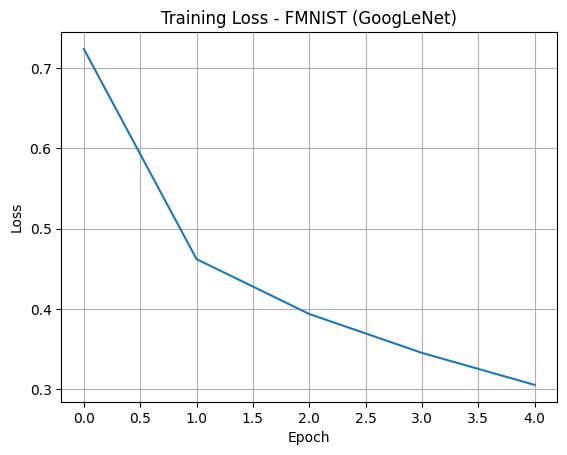


Classification Report for FMNIST (GoogLeNet):
              precision    recall  f1-score   support

           0     0.8408    0.9140    0.8759      1000
           1     0.9783    0.9940    0.9861      1000
           2     0.8406    0.9280    0.8821      1000
           3     0.9469    0.8920    0.9186      1000
           4     0.8683    0.9030    0.8853      1000
           5     0.9899    0.9780    0.9839      1000
           6     0.8266    0.6720    0.7413      1000
           7     0.9661    0.9700    0.9681      1000
           8     0.9890    0.9860    0.9875      1000
           9     0.9683    0.9770    0.9726      1000

    accuracy                         0.9214     10000
   macro avg     0.9215    0.9214    0.9201     10000
weighted avg     0.9215    0.9214    0.9201     10000


=== Training GoogLeNet on CIFAR10 ===


100%|██████████| 170M/170M [00:05<00:00, 29.7MB/s]


Epoch 1, Loss: 2.1431
Epoch 2, Loss: 1.4102
Epoch 3, Loss: 1.0754
Epoch 4, Loss: 0.8736
Epoch 5, Loss: 0.7143


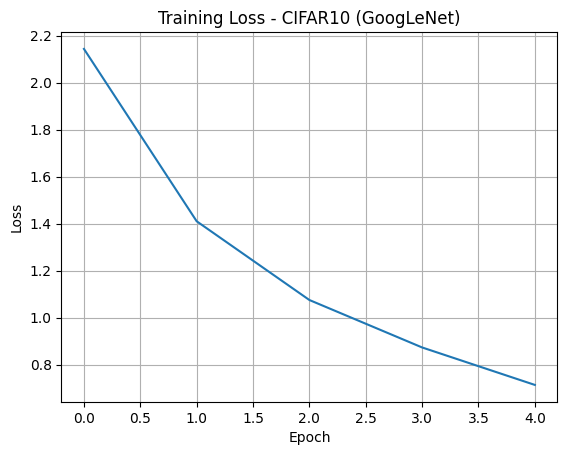


Classification Report for CIFAR10 (GoogLeNet):
              precision    recall  f1-score   support

           0     0.8648    0.7930    0.8273      1000
           1     0.9294    0.8950    0.9119      1000
           2     0.7081    0.7910    0.7473      1000
           3     0.6178    0.7340    0.6709      1000
           4     0.7952    0.7960    0.7956      1000
           5     0.8307    0.6380    0.7217      1000
           6     0.8903    0.8200    0.8537      1000
           7     0.8080    0.8840    0.8443      1000
           8     0.8890    0.8890    0.8890      1000
           9     0.8603    0.8870    0.8735      1000

    accuracy                         0.8127     10000
   macro avg     0.8194    0.8127    0.8135     10000
weighted avg     0.8194    0.8127    0.8135     10000



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from torchvision.models import googlenet, GoogLeNet_Weights
# ----------------------
# Load Dataset
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

    return train_loader, test_loader

# ----------------------
# Training and Evaluation
# ----------------------
def train_and_evaluate(dataset_name):
    print(f"\n=== Training GoogLeNet on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cpu")
    model = googlenet(weights=None, num_classes=10, aux_logits=True, init_weights=True).to('cpu')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    train_loss_history = []

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to('cpu'), labels.to('cpu')
            optimizer.zero_grad()
            outputs, aux1, aux2 = model(images)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux1, labels)
            loss3 = criterion(aux2, labels)
            loss = loss1 + 0.3 * loss2 + 0.3 * loss3
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name} (GoogLeNet)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to('cpu')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print(f"\nClassification Report for {dataset_name} (GoogLeNet):")
    print(classification_report(all_labels, all_preds, digits=4))
    record_metrics("GoogLeNet", dataset_name, all_labels, all_preds)


# ----------------------
# Run on all 3 datasets
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)


VGGNET


=== Training VGG-11 on MNIST ===


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 498kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.59MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.40MB/s]


Epoch 1, Loss: 0.2083
Epoch 2, Loss: 0.0562
Epoch 3, Loss: 0.0434
Epoch 4, Loss: 0.0336
Epoch 5, Loss: 0.0304


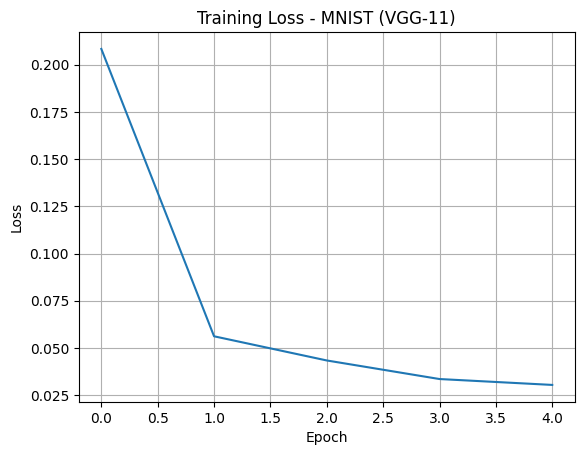


Classification Report for MNIST (VGG-11):
              precision    recall  f1-score   support

           0     0.9959    0.9959    0.9959       980
           1     0.9717    0.9991    0.9852      1135
           2     0.9990    0.9700    0.9843      1032
           3     0.9912    0.9980    0.9946      1010
           4     0.9929    0.9939    0.9934       982
           5     0.9944    0.9933    0.9938       892
           6     0.9979    0.9916    0.9948       958
           7     0.9837    0.9961    0.9899      1028
           8     0.9969    0.9908    0.9938       974
           9     0.9930    0.9832    0.9880      1009

    accuracy                         0.9912     10000
   macro avg     0.9917    0.9912    0.9914     10000
weighted avg     0.9913    0.9912    0.9912     10000


=== Training VGG-11 on FMNIST ===


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]


Epoch 1, Loss: 0.5028
Epoch 2, Loss: 0.2932
Epoch 3, Loss: 0.2386
Epoch 4, Loss: 0.1992


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from torchvision.models import vgg11

# ----------------------
# Load Dataset
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

    return train_loader, test_loader

# ----------------------
# Training and Evaluation
# ----------------------
def train_and_evaluate(dataset_name):
    print(f"\n=== Training VGG-11 on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = vgg11(weights=None)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    train_loss_history = []

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name} (VGG-11)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print(f"\nClassification Report for {dataset_name} (VGG-11):")
    print(classification_report(all_labels, all_preds, digits=4))
    record_metrics("VGG-11", dataset_name, all_labels, all_preds)

# ----------------------
# Run on all 3 datasets
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)


XCEPTION


=== Training Xception-Like on MNIST ===
Epoch 1, Loss: 1.5214
Epoch 2, Loss: 0.6671
Epoch 3, Loss: 0.3641
Epoch 4, Loss: 0.2503
Epoch 5, Loss: 0.1978


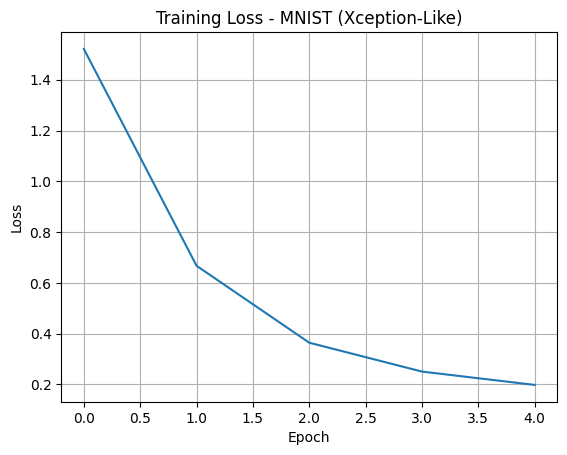


Classification Report for MNIST (Xception-Like):
              precision    recall  f1-score   support

           0     0.9514    0.9194    0.9351       980
           1     1.0000    0.0881    0.1619      1135
           2     0.8584    0.8692    0.8637      1032
           3     0.9892    0.9079    0.9468      1010
           4     0.9984    0.6405    0.7804       982
           5     0.9602    0.8386    0.8953       892
           6     0.4690    0.9875    0.6360       958
           7     1.0000    0.2899    0.4495      1028
           8     0.7494    0.9887    0.8526       974
           9     0.4787    0.9356    0.6333      1009

    accuracy                         0.7343     10000
   macro avg     0.8455    0.7465    0.7155     10000
weighted avg     0.8480    0.7343    0.7054     10000


=== Training Xception-Like on FMNIST ===


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 306kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]


Epoch 1, Loss: 1.2529
Epoch 2, Loss: 0.7406
Epoch 3, Loss: 0.6038
Epoch 4, Loss: 0.5383
Epoch 5, Loss: 0.4943


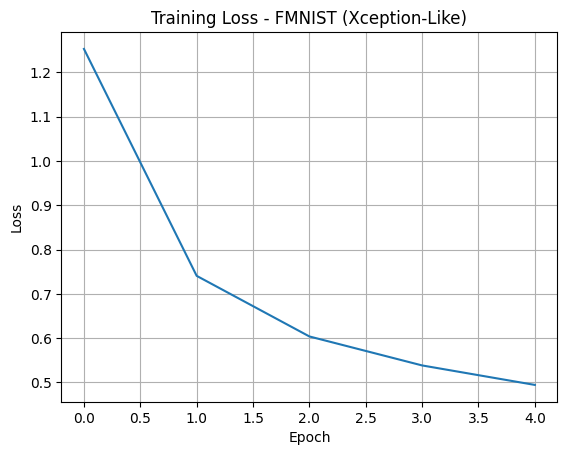


Classification Report for FMNIST (Xception-Like):
              precision    recall  f1-score   support

           0     0.7798    0.7260    0.7519      1000
           1     0.9979    0.9400    0.9681      1000
           2     0.7172    0.8140    0.7625      1000
           3     0.8706    0.7740    0.8195      1000
           4     0.7937    0.5500    0.6497      1000
           5     0.9207    0.9060    0.9133      1000
           6     0.4578    0.6340    0.5317      1000
           7     0.9594    0.8280    0.8889      1000
           8     0.7915    0.9830    0.8769      1000
           9     0.9455    0.8850    0.9143      1000

    accuracy                         0.8040     10000
   macro avg     0.8234    0.8040    0.8077     10000
weighted avg     0.8234    0.8040    0.8077     10000


=== Training Xception-Like on CIFAR10 ===


100%|██████████| 170M/170M [00:02<00:00, 76.8MB/s]


Epoch 1, Loss: 1.8876
Epoch 2, Loss: 1.6282
Epoch 3, Loss: 1.5105
Epoch 4, Loss: 1.4239
Epoch 5, Loss: 1.3652


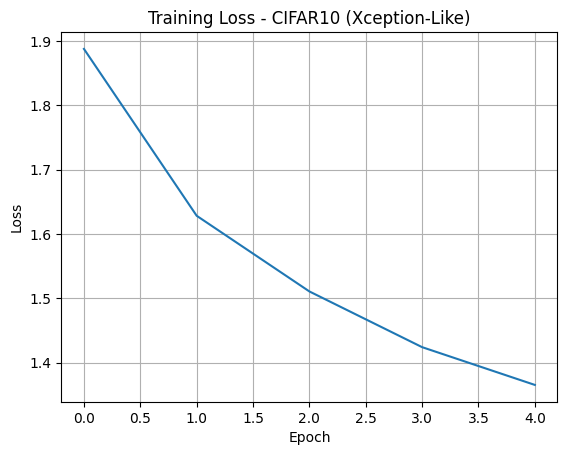


Classification Report for CIFAR10 (Xception-Like):
              precision    recall  f1-score   support

           0     0.5607    0.5500    0.5553      1000
           1     0.6637    0.5880    0.6235      1000
           2     0.3890    0.3170    0.3493      1000
           3     0.3714    0.3350    0.3523      1000
           4     0.5085    0.3610    0.4222      1000
           5     0.4804    0.5150    0.4971      1000
           6     0.5065    0.7400    0.6014      1000
           7     0.6538    0.5590    0.6027      1000
           8     0.6056    0.6880    0.6442      1000
           9     0.5719    0.6760    0.6196      1000

    accuracy                         0.5329     10000
   macro avg     0.5311    0.5329    0.5268     10000
weighted avg     0.5311    0.5329    0.5268     10000



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from torchvision.models import mobilenet_v2
from torchvision.models.feature_extraction import create_feature_extractor

# ----------------------
# Xception-Like Model Definition (Custom Implementation)
# ----------------------
class SeparableConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size, stride, padding, groups=in_channels, bias=False)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        return self.relu(x)

class XceptionLike(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            SeparableConv2d(32, 64),
            SeparableConv2d(64, 128),
            SeparableConv2d(128, 256),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        return self.classifier(x)

# ----------------------
# Load Dataset
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

    return train_loader, test_loader

# ----------------------
# Training and Evaluation
# ----------------------
def train_and_evaluate(dataset_name):
    print(f"\n=== Training Xception-Like on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = XceptionLike(num_classes=10).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    train_loss_history = []

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name} (Xception-Like)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.detach().cpu().numpy())
            all_labels.extend(labels.detach().cpu().numpy())


    print(f"\nClassification Report for {dataset_name} (Xception-Like):")
    print(classification_report(all_labels, all_preds, digits=4))
    record_metrics("Xception-Like", dataset_name, all_labels, all_preds)


# ----------------------
# Run on all 3 datasets
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)


COMPARISON

In [1]:

import matplotlib.pyplot as plt
import pandas as pd

# Store metrics for all models
metrics_summary = {
    "Model": [],
    "Dataset": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
}

# Function to record metrics per model/dataset
def record_metrics(model_name, dataset_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    metrics_summary["Model"].append(model_name)
    metrics_summary["Dataset"].append(dataset_name)
    metrics_summary["Accuracy"].append(accuracy_score(y_true, y_pred))
    metrics_summary["Precision"].append(precision_score(y_true, y_pred, average='weighted', zero_division=0))
    metrics_summary["Recall"].append(recall_score(y_true, y_pred, average='weighted', zero_division=0))
    metrics_summary["F1-Score"].append(f1_score(y_true, y_pred, average='weighted', zero_division=0))


=== Model Comparison Table ===
Empty DataFrame
Columns: [Model, Dataset, Accuracy, Precision, Recall, F1-Score]
Index: []


/tmp/ipython-input-4-2926862129.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


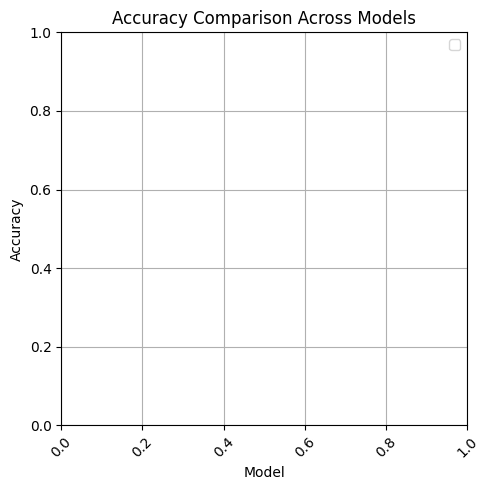

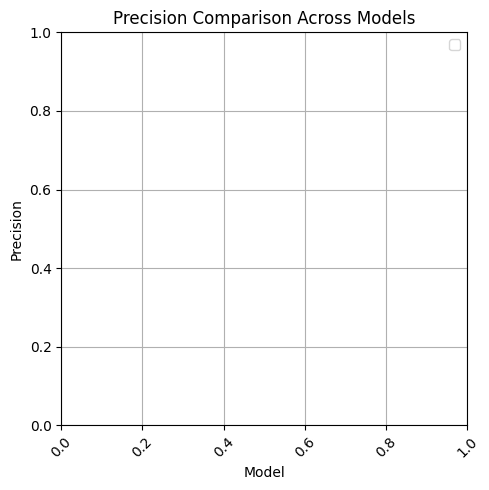

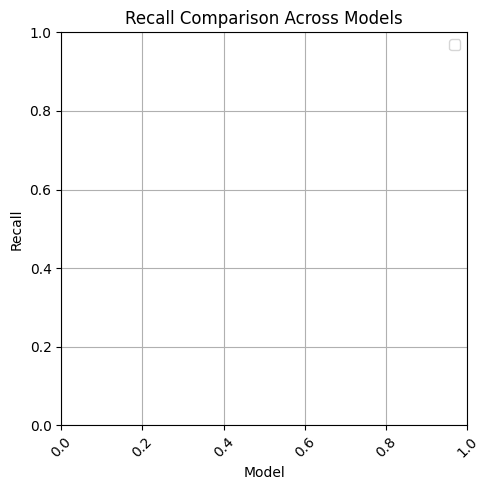

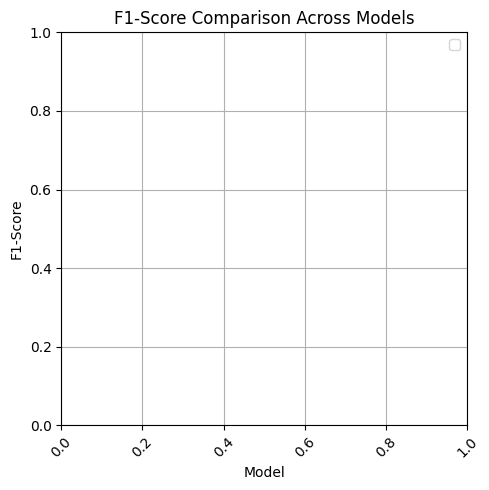

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Display summary table of metrics
df = pd.DataFrame(metrics_summary)
print("=== Model Comparison Table ===")
print(df)

# Optional: plot all metrics
for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    plt.figure(figsize=(5, 5))
    for dataset in df["Dataset"].unique():
        subset = df[df["Dataset"] == dataset]
        plt.plot(subset["Model"], subset[metric], marker='o', label=dataset)
    plt.title(f"{metric} Comparison Across Models")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
